<p style="background-color: #C68EFD;"><b>Yula Nicodemus</b> <br/>
BSIT 3-C <br/>
Activity 6</p>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
dengue = pd.read_csv('datasets//dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue['Death_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

In [5]:
dengue.dtypes

Month             object
Year               int64
Region            object
Dengue_Cases       int64
Dengue_Deaths      int64
Death_Rate       float64
dtype: object

In [6]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')


dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
Death_Rate        float64
dtype: object

In [7]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
Death_Rate       0
dtype: int64

<h1 style="background-color: #E9A5F1;">#1: What Region has the Highest and Lowest Dengue Cases in the record</h1>

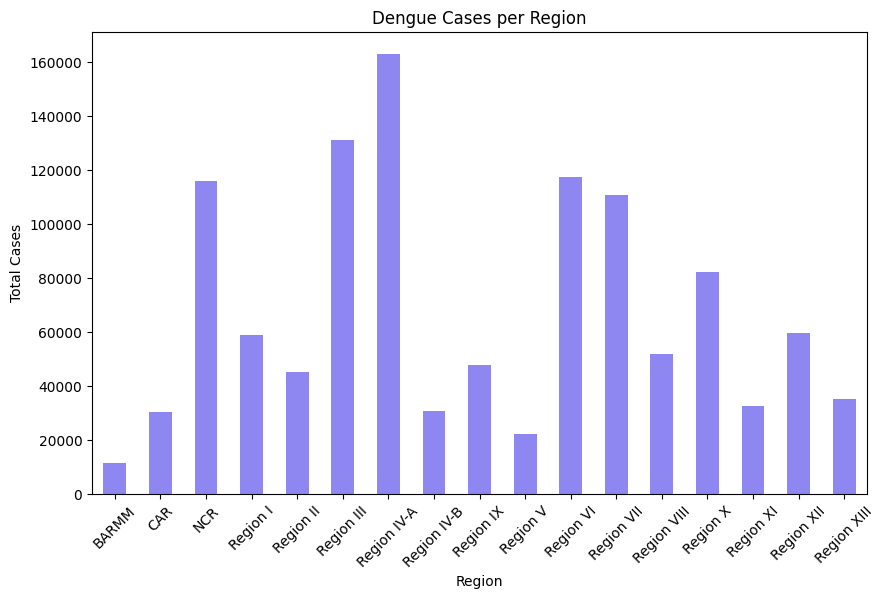

In [8]:
dengue_c = dengue.groupby('Region')['Dengue_Cases'].sum()

dengue_c.plot(kind='bar', figsize=(10, 6), color='#8F87F1')

plt.xlabel('Region')
plt.ylabel('Total Cases')
plt.title('Dengue Cases per Region')
plt.xticks(rotation=45)

plt.show()

<h1 style="background-color: #E9A5F1;">No.1: Region 4-A has the highest Dengue Cases in the record</h1>

<h1 style="background-color: #E9A5F1;">No.1(A): BARMM has the lowest record</h1>

<h1 style="background-color: #FED2E2;">#2: What Region has the Highest and Lowest Dengue Deaths in the record</h1>

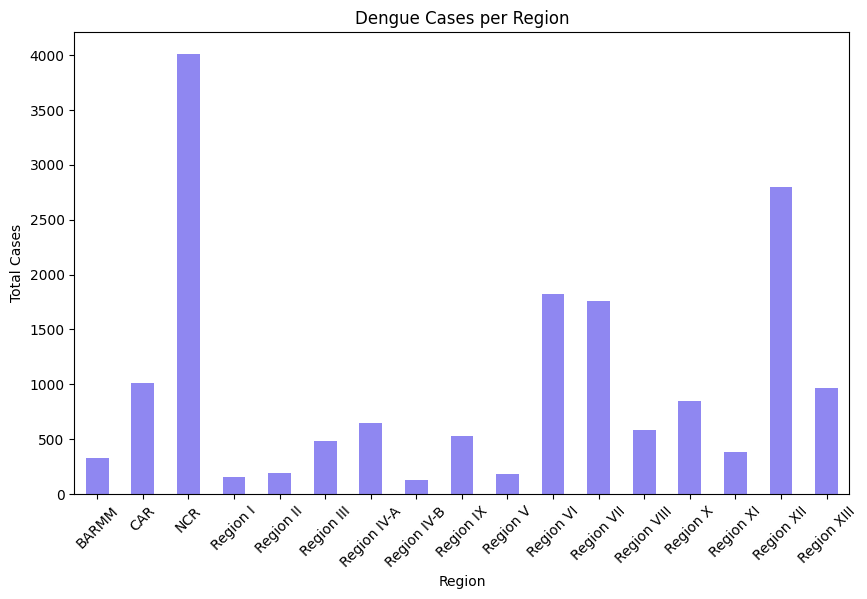

In [9]:
dengue_d = dengue.groupby('Region')['Dengue_Deaths'].sum()

dengue_d.plot(kind='bar', figsize=(10, 6), color='#8F87F1')

plt.xlabel('Region')
plt.ylabel('Total Cases')
plt.title('Dengue Cases per Region')
plt.xticks(rotation=45)

plt.show()

<h1 style="background-color: #FED2E2;">No.2: NCR has the highest Dengue Deaths in the record</h1>

<h1 style="background-color: #FED2E2;">No.2(A): Region 4-A has a lowest record</h1>

<h1 style="background-color: #E9A5F1;">#3: What are the top 6 Regions with the most dengue cases?</h1>

In [10]:
high_c = dengue.nlargest(6, 'Dengue_Cases')
high_c

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Death_Rate
224,September,2019,Region IV-A,21658,48,0.221627
403,August,2019,Region VI,18090,54,0.298507
223,August,2019,Region IV-A,15047,39,0.259188
402,July,2019,Region VI,13564,48,0.353878
884,September,2019,NCR,11033,58,0.525696
225,October,2019,Region IV-A,10365,37,0.356971


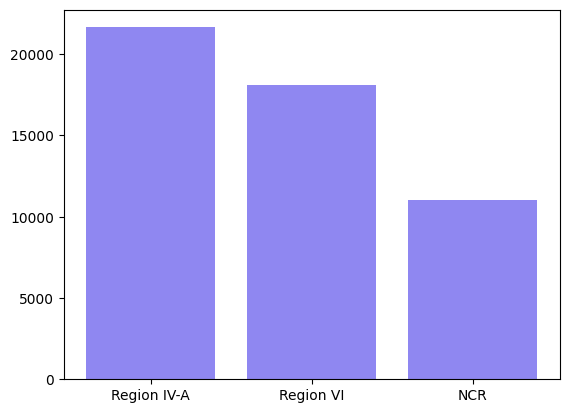

In [11]:
plt.bar(high_c['Region'], high_c['Dengue_Cases'], color ='#8F87F1')
plt.show()

<h1 style="background-color: #E9A5F1;">No.3: Region IV-A, VI, and NCR are the top 6 region that has highest dengue cases in the record</h1>

<h1 style="background-color: #FED2E2;">#4: What are the death rates of the region with the highest number of dengue cases?</h1>

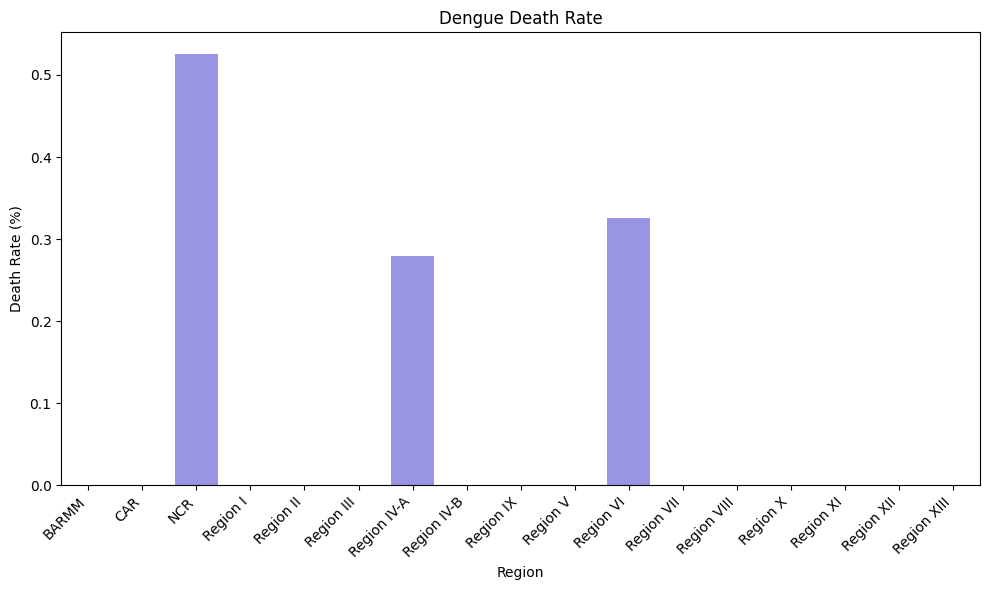

In [12]:
high_c['Death_Rate'] = (high_c['Dengue_Deaths'] / high_c['Dengue_Cases']) * 100

death_rate = high_c.groupby('Region')['Death_Rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Death_Rate', data=death_rate, color ='#8F87F1')

plt.title('Dengue Death Rate')
plt.xlabel('Region')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<h1 style="background-color: #FED2E2;">No.4: Even though NCR has the lowest dengue cases among them, it has the highest death rate compared to the other region</h1>

<h1 style="background-color: #E9A5F1;">#5: Is there a correlation between Dengue Cases and Dengue Deaths?</h1>

In [13]:
corr = dengue['Dengue_Cases'].corr(dengue['Dengue_Deaths'])
corr

np.float64(0.03832213720419492)

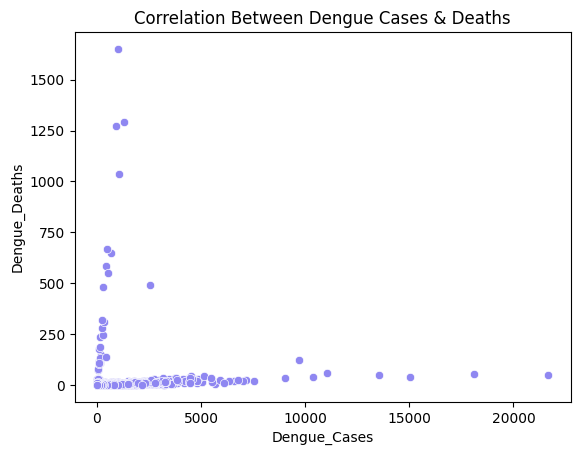

In [12]:
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths", color ='#8F87F1')
plt.title("Correlation Between Dengue Cases & Deaths")
plt.show()

<h1 style="background-color: #E9A5F1;">No.5: There is no correlation between Dengue Deaths and Dengue Cases</h1>

<h1 style="background-color: #FED2E2;">#6: What Region has the Highest and Lowest Death Rates in the record</h1>

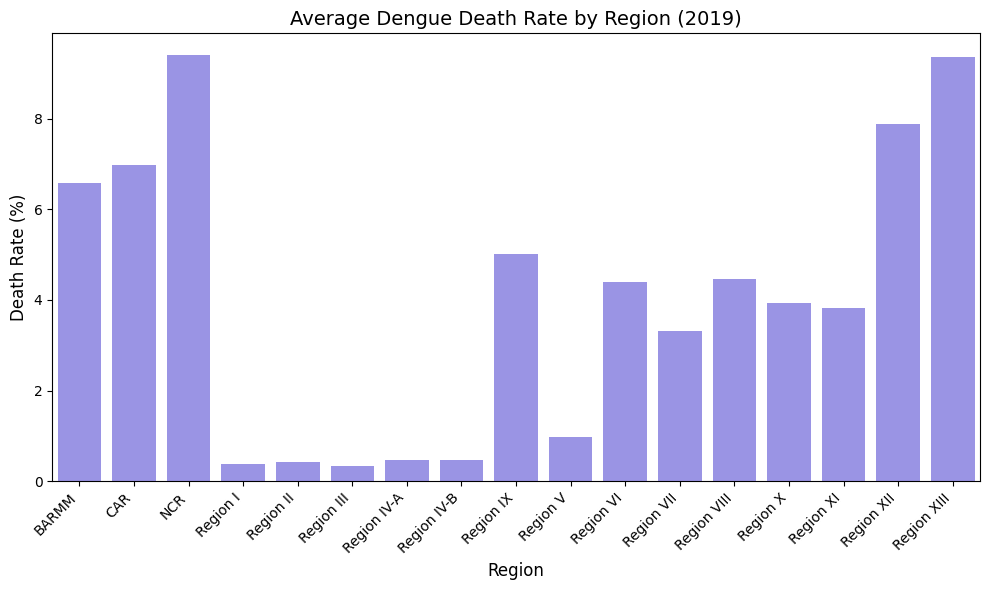

In [13]:
per_reg_death_rate = dengue.groupby('Region')['Death_Rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Death_Rate', data=per_reg_death_rate, color ='#8F87F1')

plt.title('Average Dengue Death Rate by Region (2019)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Death Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<h1 style="background-color: #FED2E2;">No.6: NCR and Region XIII has the highest Death Rates </h1>

<h1 style="background-color: #FED2E2;">No.6(A): Region III is the lowest in the record</h1>

<h6>Region XIII got the most highest death records even though their dengue cases is not that high. There is a possibility that there's no hospital that have a cure to a dengue tha's why the death rates of that region is not that high</h6>

<h1 style="background-color: #E9A5F1;">#7: What Year has the most Dengue Cases recorded</h1>

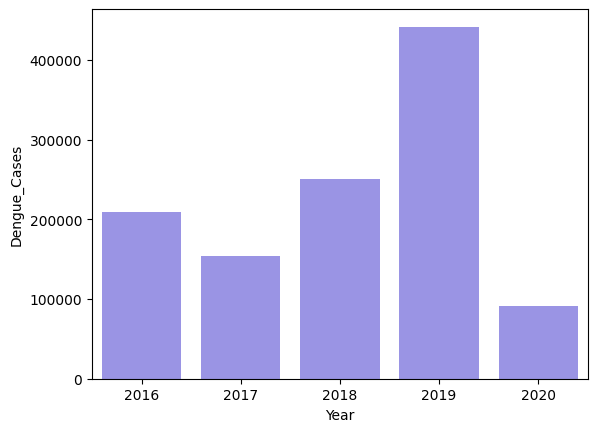

In [14]:
year_dc = dengue.groupby(["Year"])['Dengue_Cases'].sum().reset_index()
sns.barplot(data=year_dc, x="Year", y="Dengue_Cases", color ='#8F87F1' )
plt.show()

<h1 style="background-color: #E9A5F1;">No.7: Year 2019 got the most recorded dengue cases</h1>

<h1 style="background-color: #E9A5F1;">No.7(A): Year 2020 got the lowest recorded dengue cases</h1>

<h6>There's a big changes of cases in year. It is possible that because of covid. Most people are in their house and the dengue cases in year 2020 dropped like that</h6>

<h1 style="background-color: #FED2E2;">#8: What Month has the most Dengue Rates recorded</h1>

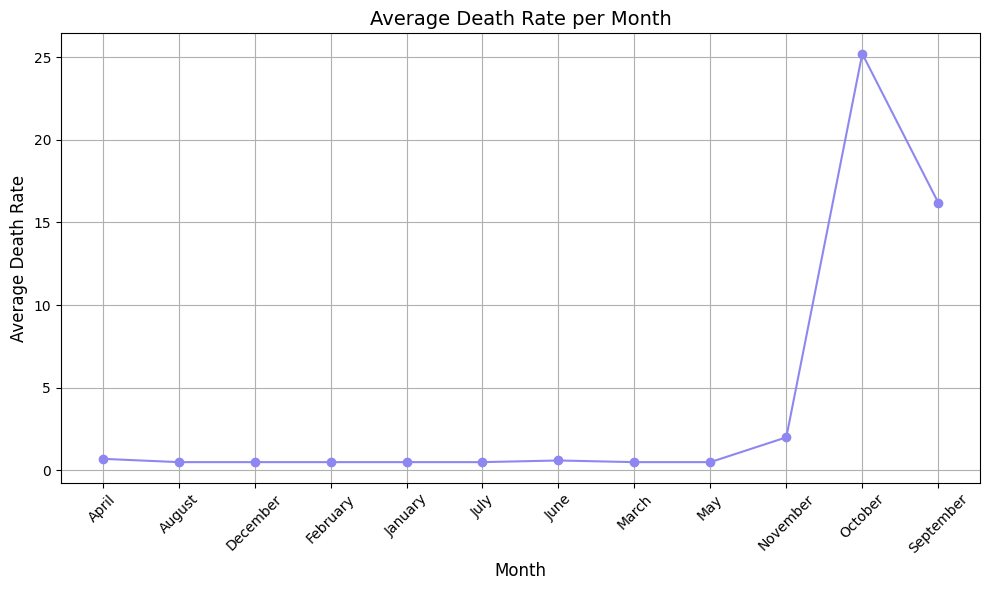

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(month_dengue['Month'], month_dengue['Death_Rate'], marker='o', linestyle='-', color ='#8F87F1')

plt.title('Average Death Rate per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Death Rate', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.grid(True)

plt.show()

<h1 style="background-color: #FED2E2;">No.8: Month of October got the most recorded dengue rates</h1>

<h1 style="background-color: #E9A5F1;">#9: The graph below shows how the cases change.</h1>

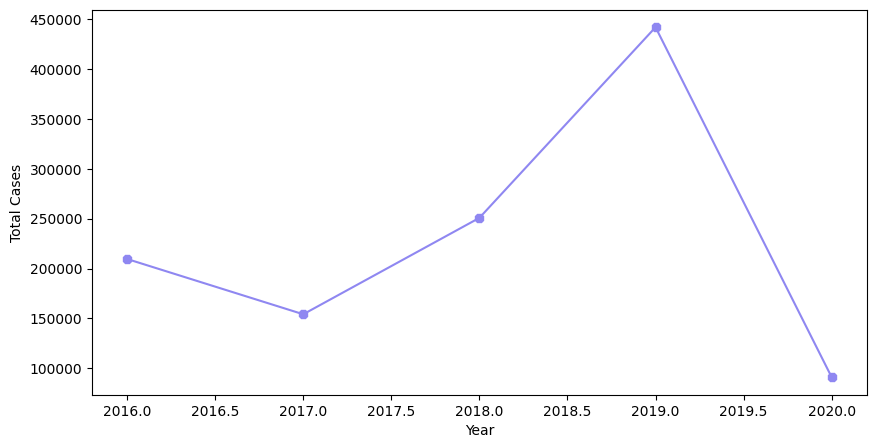

In [304]:
dengue_trends = dengue.groupby("Year")["Dengue_Cases"].sum()

plt.figure(figsize=(10,5))
dengue_trends.plot(kind="line", marker="8", color ='#8F87F1')
plt.xlabel("Year")
plt.ylabel("Total Cases")

plt.show()

<h1 style="background-color: #E9A5F1;">No.9: It shows that 2019 had the most cases, and 2020 had the lowest</h1>

<h1 style="background-color: #FED2E2;">#10: What year has the most dengue deaths?</h1>

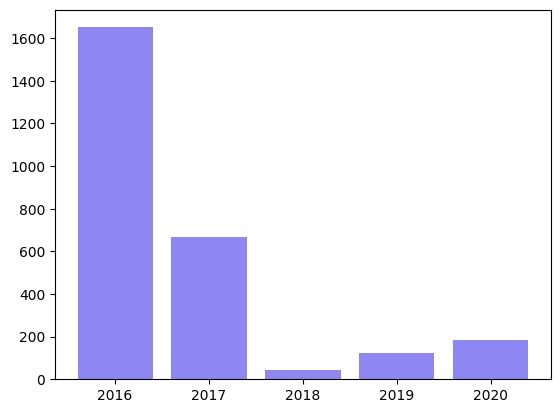

In [21]:
plt.bar(dengue['Year'],dengue['Dengue_Deaths'], color ='#8F87F1')
plt.show()

<h1 style="background-color: #FED2E2;">No.10: Year 2016 got the most recorded dengue deaths</h1>

<h1 style="background-color: #E9A5F1;">#11: What year has the most dengue deaths?</h1>

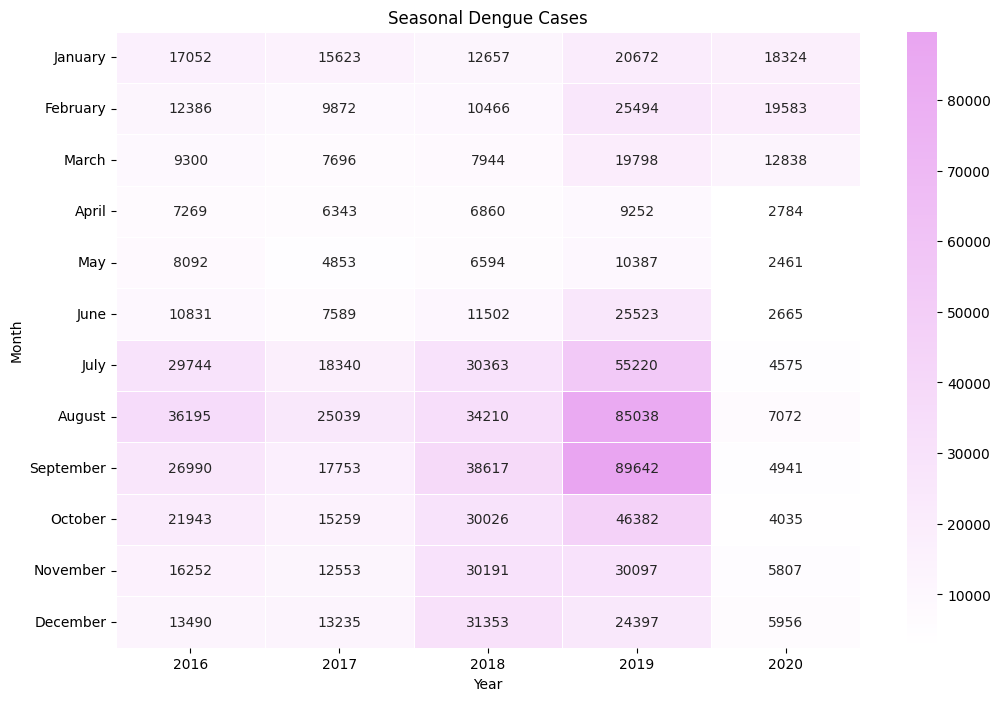

In [40]:
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap


seasons = dengue.groupby(["Year", "Month"])["Dengue_Cases"].sum().reset_index()

heatmap = seasons.pivot(index="Month", columns="Year", values="Dengue_Cases")

months = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

heatmap.index = pd.CategoricalIndex(heatmap.index, categories=months, ordered=True)
heatmap = heatmap.sort_index()

colors = ['white', '#E9A5F1']
cmap = LinearSegmentedColormap.from_list("custom_purple", colors, N=256)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap, cmap=cmap, annot=True, fmt=".0f", linewidths=.5)
plt.title("Seasonal Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

<h1 style="background-color: #E9A5F1;">No.11: As you can see, the darker the color, the higher the number of dengue cases.</h1>